In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import norm
import pandas as pd
import math

# Functions

In [ ]:

def data_generator1(n,pi_hat=0.5,mean1=0,mean2=1,sigma1=0.8,sigma2=0.4):
  x = []
  rv = bernoulli.rvs(1-pi_hat,size=n)
  for i in range(n):
    if(rv[i] == 1):
      x.append(np.random.normal(mean1,sigma1))
    else:
      x.append(np.random.normal(mean2,sigma2))
  x = np.array(x)
  return x
  

In [ ]:

def data_generator2(n,pi_hat=0.1,mean1=0,mean2=1,sigma1=0.8,sigma2=0.4):
  x = []
  rv = bernoulli.rvs(1-pi_hat,size=n)
  for i in range(n):
    if(rv[i] == 1):
      x.append(np.random.normal(mean1,sigma1))
    else:
      x.append(np.random.normal(mean2,sigma2))
  x = np.array(x)
  return x

In [ ]:
def compute_r(theta,x,pi_hat):
  mu1,mu2,sd1,sd2 = list(theta)
  r = np.zeros(x.shape)
  j=0
  for i in x:
    r[j] = (pi_hat*math.e**(-(i-mu2)**2/2/sd2**2)/np.sqrt(2*math.pi)/sd2/(pi_hat*math.e**(-(i-mu2)**2/2/sd2**2)/np.sqrt(2*math.pi)/sd2 + (1-pi_hat)*math.e**(-(i-mu1)**2/2/sd1**2)/np.sqrt(2*math.pi)/sd1))
    j+=1
  return r

In [ ]:
def EM_1(pi_hat,theta_initial,x,tolerance,n_iter=1000):
  theta = theta_initial
  iter_1 = 0
  error = 100
  theta_values = theta.copy()
  error_values= np.array([error])
  while(error>tolerance):
    iter_1 += 1
    if iter_1 > n_iter:
      break
    theta_old = theta.copy()
    r = compute_r(theta,x,pi_hat)
    theta[0] = np.dot(1-r,x)/np.sum(1-r)
    theta[1] = np.dot(r,x)/np.sum(r)
    theta[2] = np.sqrt(np.dot(1-r,np.square(x-theta[0]))/np.sum(1-r))
    theta[3] = np.sqrt(np.dot(r,np.square(x-theta[1]))/np.sum(r))
    theta_values = np.vstack((theta_values,theta)) #theta values at every iterations
    error = np.max(np.abs(theta-theta_old))
    error_values = np.append(error_values,error) #error values at every iterations

  error_values[0] = error_values[1]
  return theta_values,theta,error_values,iter_1

In [ ]:
def EM_2(theta_initial,x,tolerance,n_iter=1000):
  theta = theta_initial.copy()
  iter_1 = 0
  error = 100
  theta_values = theta.copy()
  error_values= np.array([error])
  while(error>tolerance):
    iter_1 += 1
    if iter_1 > n_iter:
      break
    theta_old = theta.copy()
    r = compute_r(theta[1:5],x,theta[0])
    theta[0] = np.sum(r)/np.prod(x.shape)
    theta[1] = np.dot(1-r,x)/np.sum(1-r)
    theta[2] = np.dot(r,x)/np.sum(r)
    theta[3] = np.sqrt(np.dot(1-r,np.square(x-theta[1]))/np.sum(1-r))
    theta[4] = np.sqrt(np.dot(r,np.square(x-theta[2]))/np.sum(r))
    error = np.max(np.abs(theta-theta_old))
    theta_values = np.vstack((theta_values,theta)) #theta values at every iterations
    error_values = np.append(error_values,error) #error values at every iterations

  error_values[0] = error_values[1]
  return theta_values,theta,error_values,iter_1

# Question 1

,μ1,μ2,σ1,σ2
10,-0.150364,1.236028,0.431105,0.227853
1000,0.038738,1.016790,0.746436,0.362946
10000,0.006215,0.999625,0.804073,0.400814


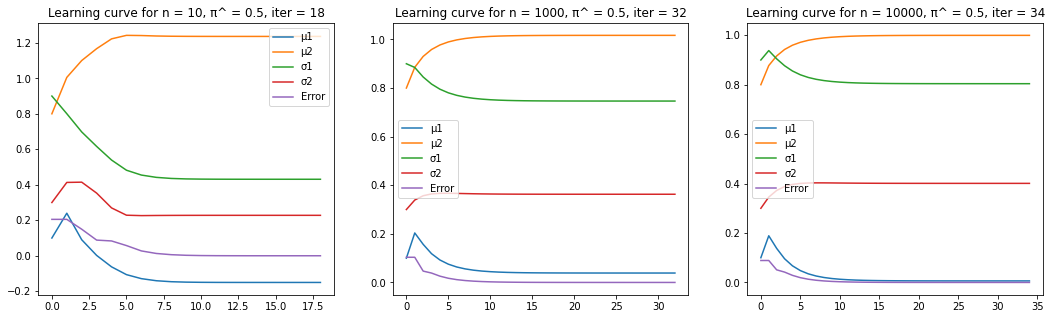

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(18,5), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator1(n)
  theta_initial = np.array([0.1,0.8,0.9,0.3])
  pi_hat = .5 # pi
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_1(pi_hat,theta_initial,x,tolerance,n_iter = 10000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)
  axs[subplot_no].set_title("Learning curve for n = {}, \u03C0^ = {}, iter = {}".format(n,pi_hat,iter_1))
  axs[subplot_no].plot(theta_values1[:,0],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C32')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1

df.columns = ['\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

,μ1,μ2,σ1,σ2
10,-0.449780,0.542303,0.293103,0.058297
1000,-0.395439,0.558267,0.696429,0.661051
10000,-0.370300,0.589892,0.686043,0.645224


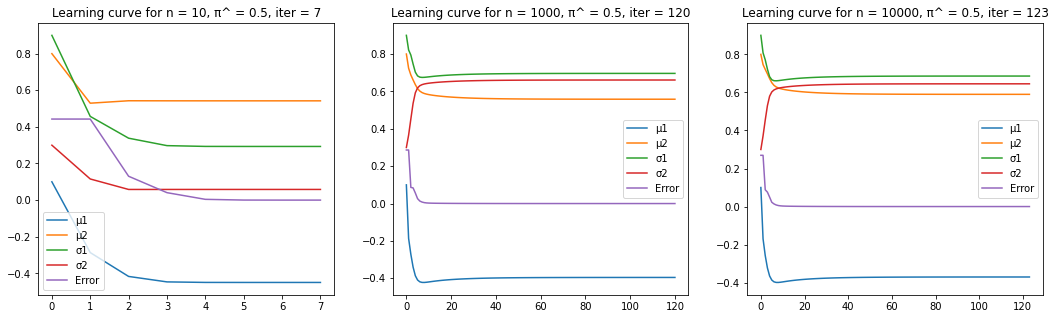

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(18,5), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator2(n)
  theta_initial = np.array([0.1,0.8,0.9,0.3])
  pi_hat = .5 # pi
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_1(pi_hat,theta_initial,x,tolerance,n_iter = 10000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {}, \u03C0^ = {}, iter = {}".format(n, pi_hat,iter_1))
  axs[subplot_no].plot(theta_values1[:,0],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C32')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

,μ1,μ2,σ1,σ2
10,-0.112939,1.232993,0.626999,0.182859
1000,-0.022658,0.884172,0.810034,0.391996
10000,0.004006,0.984874,0.800628,0.387599


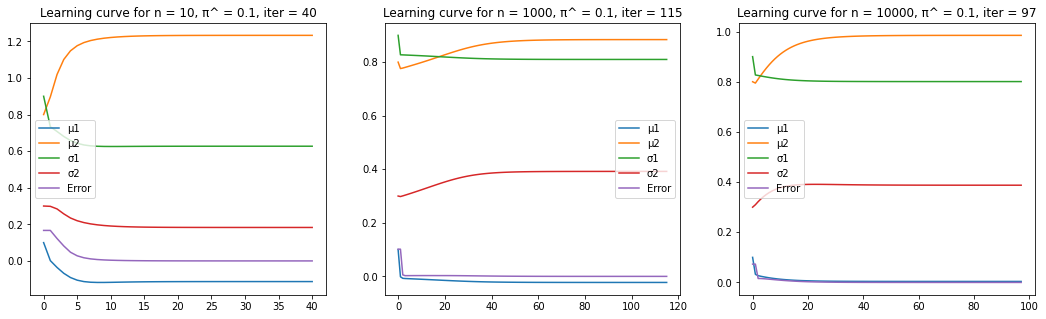

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(18,5), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator2(n)
  theta_initial = np.array([0.1,0.8,0.9,0.3])
  pi_hat = 0.1
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_1(pi_hat,theta_initial,x,tolerance,n_iter = 10000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {}, \u03C0^ = {}, iter = {}".format(n, pi_hat,iter_1))
  axs[subplot_no].plot(theta_values1[:,0],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C32')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

# Question 2

,π^,μ1,μ2,σ1,σ2
10,0.177329,0.877772,0.880330,0.770816,0.012886
1000,0.476523,-0.024955,1.057132,0.749150,0.352239
10000,0.492107,0.008560,1.010483,0.805346,0.406740


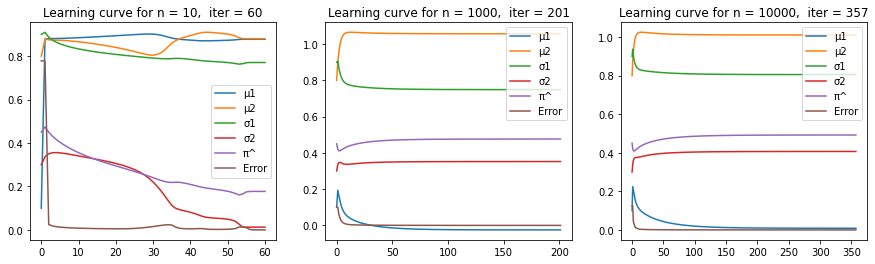

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(15,4), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator1(n)
  theta_initial = np.array([0.45,0.1,0.8,0.9,0.3])
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_2(theta_initial,x,tolerance,n_iter = 10000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {},  iter = {}".format(n,iter_1))
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,4],label='\u03C32')
  axs[subplot_no].plot(theta_values1[:,0],label='\u03C0^')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03C0^','\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

,π^,μ1,μ2,σ1,σ2
10,0.200171,1.050885,-1.233538,0.348809,0.496025
1000,0.412314,0.995004,-0.132603,0.399047,0.726612
10000,0.482905,0.990477,-0.054995,0.413345,0.804879


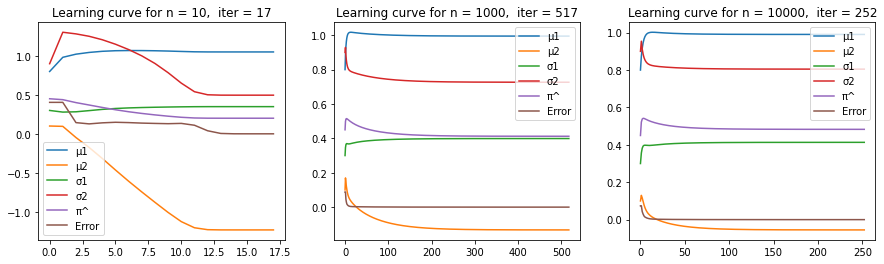

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(15,4), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator1(n)
  theta_initial = np.array([0.45,0.8,0.1,0.3,0.9])
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_2(theta_initial,x,tolerance,n_iter = 1000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {},  iter = {}".format(n,iter_1))
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,4],label='\u03C32')
  axs[subplot_no].plot(theta_values1[:,0],label='\u03C0^')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03C0^','\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

,π^,μ1,μ2,σ1,σ2
10,0.604467,-0.503275,0.876822,0.246077,0.370396
1000,0.093598,0.015794,0.943516,0.789093,0.311200
10000,0.098248,-0.000393,1.034710,0.797671,0.434149


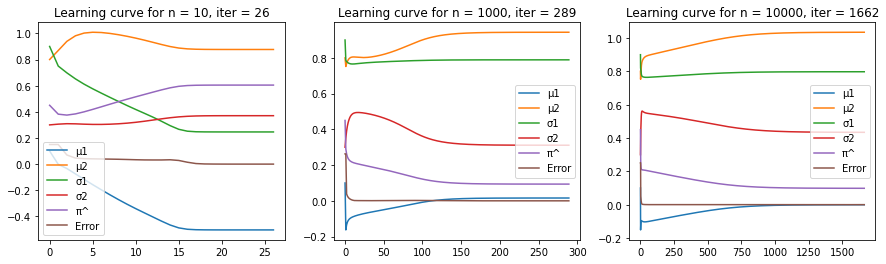

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(15,4), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator2(n)
  theta_initial = np.array([0.45,0.1,0.8,0.9,0.3])
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_2(theta_initial,x,tolerance,n_iter = 2000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {}, iter = {}".format(n,iter_1))
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,4],label='\u03C32')
  axs[subplot_no].plot(theta_values1[:,0],label='\u03C0^')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03C0^','\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

,π^,μ1,μ2,σ1,σ2
10,0.706035,0.807667,-0.557142,0.365908,0.719729
1000,0.661287,0.865565,-0.305838,0.504376,0.699552
10000,0.898005,1.049438,-0.009293,0.395162,0.779274


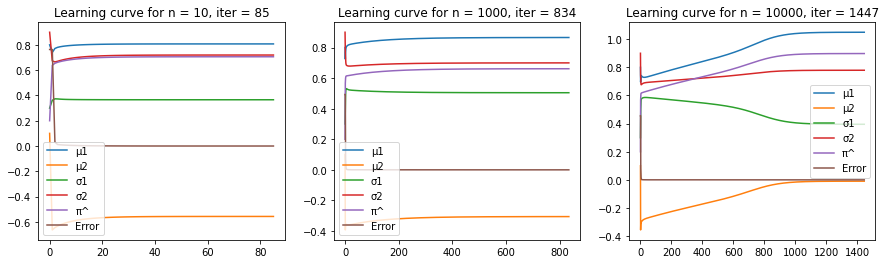

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(1,3,figsize=(15,4), gridspec_kw={'width_ratios': [1, 1, 1]})
for n in [10,1000,10000]:
  x = data_generator2(n)
  theta_initial = np.array([0.2,0.8,0.1,0.3,0.9])
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_2(theta_initial,x,tolerance,n_iter = 2000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[subplot_no].set_title("Learning curve for n = {}, iter = {}".format(n,iter_1))
  axs[subplot_no].plot(theta_values1[:,1],label='\u03bc1')
  axs[subplot_no].plot(theta_values1[:,2],label='\u03bc2')
  axs[subplot_no].plot(theta_values1[:,3],label='\u03C31')
  axs[subplot_no].plot(theta_values1[:,4],label='\u03C32')
  axs[subplot_no].plot(theta_values1[:,0],label='\u03C0^')
  axs[subplot_no].plot(error_values,label='Error')
  axs[subplot_no].legend()
  subplot_no += 1
df.columns = ['\u03C0^','\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [10,1000,10000]
df

# Question 3

,π^,μ1,μ2,σ1,σ2
1,0.467449,0.076975,1.011063,0.808108,0.377761
2,0.531238,0.184809,0.768835,0.798161,0.414012
3,0.487633,0.430366,0.565208,0.804488,0.403116
4,0.466307,0.430600,0.520679,0.790324,0.385743


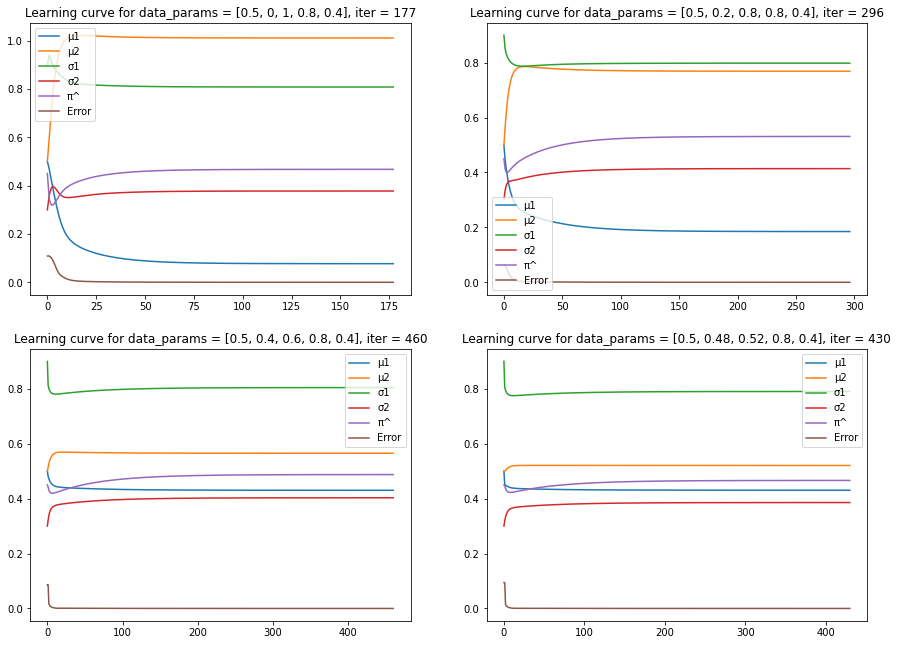

In [ ]:
df = pd.DataFrame()
subplot_no=0
fig, axs = plt.subplots(2,2,figsize=(15,11))
# data parameters for generating data
data_param = [[0.5,0,1,0.8,0.4],[0.5,0.2,0.8,0.8,0.4],[0.5,0.4,0.6,0.8,0.4],[0.5,0.48,0.52,0.8,0.4]]
n=5000
for k in data_param:
  pi_hat,mean1,mean2,sigma1,sigma2 = k
  x = data_generator2(n,pi_hat,mean1,mean2,sigma1,sigma2)
  theta_initial = np.array([0.45,0.5,0.5,0.9,0.3])
  tolerance = 1e-6
  theta_values1,theta_ml,error_values,iter_1 = EM_2(theta_initial,x,tolerance,n_iter = 2000)
  df = df.append(pd.Series(theta_ml),ignore_index = True)

  axs[int(subplot_no/2)][subplot_no%2].set_title("Learning curve for data_params = {}, iter = {}".format(k,iter_1))
  axs[int(subplot_no/2)][subplot_no%2].plot(theta_values1[:,1],label='\u03bc1')
  axs[int(subplot_no/2)][subplot_no%2].plot(theta_values1[:,2],label='\u03bc2')
  axs[int(subplot_no/2)][subplot_no%2].plot(theta_values1[:,3],label='\u03C31')
  axs[int(subplot_no/2)][subplot_no%2].plot(theta_values1[:,4],label='\u03C32')
  axs[int(subplot_no/2)][subplot_no%2].plot(theta_values1[:,0],label='\u03C0^')
  axs[int(subplot_no/2)][subplot_no%2].plot(error_values,label='Error')
  axs[int(subplot_no/2)][subplot_no%2].legend()
  subplot_no += 1
df.columns = ['\u03C0^','\u03bc1','\u03bc2','\u03C31','\u03C32']
df.index = [1,2,3,4]
df